In [2]:
import numpy as np
import matplotlib.pyplot as plt

angle_data = np.loadtxt('angle.txt') #,skiprows=1)
angle_data = np.array(angle_data)



# a single plort is in the 5 second range
for i in range(180):
    fig = plt.figure(figsize=(18, 10))
    temporal_data = angle_data[i*1000: (i+1)*1000-500, 1:]
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    temporal_data = temporal_data.T
    ax.scatter3D(temporal_data[0], temporal_data[1], temporal_data[2], cmap='Greens');
    
    temporal_data = angle_data[(i+1)*1000-500: (i+1)*1000, 1:]
    temporal_data = temporal_data.T
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.scatter3D(temporal_data[0], temporal_data[1], temporal_data[2], cmap='Greens');




<ipython-input-11-5c07911b2833>:22: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


<Figure size 1296x720 with 0 Axes>

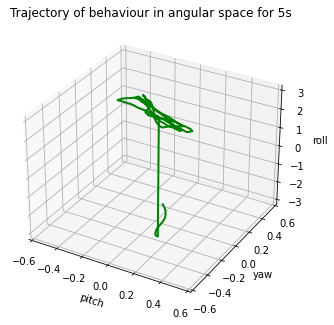

In [11]:
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

i = 100

fig = plt.figure(figsize=(18, 10))
temporal_data = angle_data[i*200: (i+1)*200, 1:]
temporal_data = temporal_data.T
# ax.scatter3D(temporal_data[0], temporal_data[1], temporal_data[2], cmap='Greens');

def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line

dataSet = np.array([temporal_data[0], temporal_data[1], temporal_data[2]])
numDataPoints = len(temporal_data[2])  # t is the z-axis

# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('pitch')
ax.set_ylabel('yaw')
ax.set_zlabel('roll')
ax.set_title('Trajectory of behaviour in angular space for 5s')

ax.set_xlim(-0.6,0.6)
ax.set_ylim(-0.6,0.6)
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=50, blit=False)
line_ani.save(r'AnimationNew100.mp4')
 
 
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
 
# References
# https://gist.github.com/neale/e32b1f16a43bfdc0608f45a504df5a84
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c
# https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation
 
# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line
 
 
# THE DATA POINTS
t = np.arange(0,20,0.2) # This would be the z-axis ('t' means time here)
x = np.cos(t)-1
y = 1/2*(np.cos(2*t)-1)
dataSet = np.array([x, y, t])
numDataPoints = len(t)
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure()
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X(t)')
ax.set_ylabel('Y(t)')
ax.set_zlabel('time')
ax.set_title('Trajectory of electron for E vector along [120]')
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=50, blit=False)
#line_ani.save(r'AnimationNew.mp4')
 
 
plt.show()